# 1) To set up your own data cleaning pipeline

In [1]:
#Load the datasets
def read_dataset(name): #when only one dataset is provided as input
    import pandas as pd
    if name == "gpsa":
        df = pd.read_csv('../datasets/googleplaystore.csv', sep=',', encoding ='ISO-8859-1')
    elif name == "gpsu":
        df = pd.read_csv('../datasets/googleplaystore_reviews.csv', sep=',',encoding = 'ISO-8859-1')  
    elif name == "titanic":
        df = pd.read_csv('../datasets/titanic/titanic_train.csv', sep=',', encoding ='ISO-8859-1')
    elif name == "house":
        df = pd.read_csv('../datasets/house/house_train.csv', sep=',', encoding ='ISO-8859-1')
    else: 
        raise ValueError('Invalid dataset name')               
    return df


In [2]:
read_dataset("gpsu").head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


## - Loading your data

In [3]:
import learn2clean.loading.reader as rd 
import learn2clean.normalization.normalizer as nl 
import pandas as pd

# executing profiling function for one dataset as input
rd.profile_summary(read_dataset('gpsu'), plot=False)


Profiling datasets
                Attribute     Type  Num. Missing Values  Num. Unique Values             Sknewness  Kurtosis
0      Sentiment_Polarity  float64              26863.0              6196.0  -0.10457655084633158  0.646756
1  Sentiment_Subjectivity  float64              26863.0              4531.0   -0.3063336025424886 -0.282853
2                     App   object                  0.0              1074.0                   N/A       N/A
3       Translated_Review   object              26868.0             27995.0                   N/A       N/A
4               Sentiment   object              26863.0                 4.0                   N/A       N/A


In [4]:

read_dataset('gpsu')['Sentiment'].head() # the target variable is numerical 


0    Positive
1    Positive
2         NaN
3    Positive
4    Positive
Name: Sentiment, dtype: object

In [5]:
# encoding of the target variable
import learn2clean.loading.reader as rd 
d_enc = rd.Reader(sep=',',verbose=True, encoding=True) 

gpsu  = ["../datasets/googleplaystore_reviews.csv"]
gpsu_encoded = d_enc.train_test_split(gpsu, 'Sentiment')
gpsu_encoded['train'].head()
gpsu_encoded['test'].head()


Reading csv : googleplaystore_reviews.csv ...
Reading data ...
CPU time: 4.710262060165405 seconds
Profiling datasets
                Attribute     Type  Num. Missing Values  Num. Unique Values             Sknewness  Kurtosis
0      Sentiment_Polarity  float64              26863.0              6196.0  -0.10457655084633158  0.646756
1  Sentiment_Subjectivity  float64              26863.0              4531.0   -0.3063336025424886 -0.282853
2                     App   object                  0.0              1074.0                   N/A       N/A
3       Translated_Review   object              26868.0             27995.0                   N/A       N/A
4               Sentiment   object              26863.0                 4.0                   N/A       N/A

> Number of categorical features in the training set: 3
> Number of numerical features in the training set: 2
> Number of data samples : 64295

> Top sparse features (% missing values on dataset set):
Translated_Review         41.7


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
7334,Angry Birds 2,NaN,3,NaN,NaN
10900,BIG Launcher,Great Great I cannot delete recent calls even paid version.,2,0.533333,0.583333
62550,"Hola Launcher- Theme,Wallpaper",NaN,3,NaN,NaN
42242,FOX,"From bad to worse, after the last update I can already stream, start for 5 seconds then turn off...",0,-0.275000,0.583333
22985,Camera360: Selfie Photo Editor with Funny Sticker,NaN,3,NaN,NaN


## - Normalize your data

In [6]:
# >> Examples of normalization
# The choice for the normalizer : 'ZS', 'MM','DS' or 'Log10'
#    Available strategies=
#       - 'ZS' z-score normalization
#       - 'MM' MinMax scaling
#       - 'DS' decimal scaling
#       - 'Log10 log10 scaling

import learn2clean.normalization.normalizer as nl 

# MM normalization with exclude = None, all numeric variables will be normalized
n1= nl.Normalizer(gpsu_encoded.copy(),strategy='MM',exclude='Sentiment')

n1.transform()['train'].head()


>>Normalization 
* For train dataset
... train dataset
* For test dataset
... test dataset
Normalization done -- CPU time: 0.07133197784423828 seconds



,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,App,Translated_Review
0,2,1.000,0.533333,10 Best Foods for You,"I like eat delicious food. That's I'm cooking food myself, case ""10 Best Foods"" helps lot, also ..."
1,2,0.625,0.288462,10 Best Foods for You,This help eating healthy exercise regular basis
4,2,1.000,0.300000,10 Best Foods for You,Best idea us
6,2,0.800,0.900000,10 Best Foods for You,Amazing
8,1,0.500,0.000000,10 Best Foods for You,"Looking forward app,"


In [7]:

#ZS normalization
n1= nl.Normalizer(gpsu_encoded.copy(),strategy='ZS',exclude='Sentiment', verbose = False)
n1.transform()['train'].head()

#DS scaling
n2= nl.Normalizer(gpsu_encoded.copy(),strategy='DS',exclude='Sentiment', verbose = False)
n2.transform()['train'].head()


>>Normalization 
* For train dataset
... train dataset
* For test dataset
... test dataset
Normalization done -- CPU time: 0.05700802803039551 seconds

>>Normalization 
* For train dataset
... train dataset
* For test dataset
... test dataset
Normalization done -- CPU time: 0.06347107887268066 seconds



,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,App,Translated_Review
0,2,1.000000,0.518519,10 Best Foods for You,"I like eat delicious food. That's I'm cooking food myself, case ""10 Best Foods"" helps lot, also ..."
1,2,0.603865,0.209730,10 Best Foods for You,This help eating healthy exercise regular basis
4,2,1.000000,0.213675,10 Best Foods for You,Best idea us
6,2,0.888889,0.946667,10 Best Foods for You,Amazing
8,1,0.277778,0.000000,10 Best Foods for You,"Looking forward app,"


## - Replace missing values

In [8]:
#>> Examples for missing value imputation
# Available strategies:
#            - 'EM': only for numerical variables; imputation based on
#                expectation maximization
#            - 'MICE': only for numerical variables  missing at random (MAR);
#                Multivariate Imputation by Chained Equations
#            - 'KNN', only for numerical variables; k-nearest neighbor
#                imputation (k=4) which weights samples using the mean squared
#                difference on features for which two rows both have observed
#                data
#            - 'RAND', 'MF': both for numerical and categorical variables;
#                replace missing values by randomly selected value in the 
#                variable domain or by the most frequent value in the variable
#                domain respectively
#            - 'MEAN', 'MEDIAN': only for numerical variables; replace missing
#                values by mean or median of the numerical variable respectvely
#            - or 'DROP' remove the row with at least one missing value

import learn2clean.imputation.imputer as imp

# replace missing values by the most frequent ones in the training and testing datasets

imp1 = imp.Imputer(gpsu_encoded.copy(),strategy='MF', verbose=True).transform()

imp2 = imp.Imputer(gpsu_encoded.copy(),strategy='MEDIAN', verbose=True).transform()
imp1['train'].head()

>>Imputation 
* For train dataset
Before imputation:
Total 53923 missing values in ['Translated_Review', 'Sentiment_Polarity', 'Sentiment_Subjectivity']
- 35946 numerical missing values in ['Sentiment_Polarity', 'Sentiment_Subjectivity']
- 17977 non-numerical missing values in ['Translated_Review']
Most frequent value for  App is: Angry Birds Classic
Most frequent value for  Translated_Review is: Good
Most frequent value for  Sentiment is: 3
Most frequent value for  Sentiment_Polarity is: 0.0
Most frequent value for  Sentiment_Subjectivity is: 0.0
After imputation:
Total 0 missing values
- 0 numerical missing values
- 0 non-numerical missing values
* For test dataset
Before imputation:
Total 26671 missing values in ['Translated_Review', 'Sentiment_Polarity', 'Sentiment_Subjectivity']
- 17780 numerical missing values in ['Sentiment_Polarity', 'Sentiment_Subjectivity']
- 8891 non-numerical missing values in ['Translated_Review']
Most frequent value for  App is: Bowmasters
Most frequent v

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
27559,Clover Dating App,Good,3,0.0,0.0
60204,Harry Potter: Hogwarts Mystery,"I'm enjoying gameplay, story & mechanics. The latest updates introduced fun ways earn in-game co...",2,0.1,0.5
15160,"Black Wallpaper, AMOLED, Dark Background: Darkify",Good,3,0.0,0.0
19450,CBS News,Good,3,0.0,0.0
54880,Google Ads,Thanks,2,0.2,0.2


## - Detect outliers and remove them

In [9]:
# >> Examples for outlier detection and removal
# Available strategies =
#            'ZS': detects outliers using the robust Zscore as a function
#            of median and median absolute deviation (MAD)
#            'IQR': detects outliers using Q1 and Q3 +/- 1.5*InterQuartile Range
#            'LOF': detects outliers using Local Outlier Factor

                
import learn2clean.outlier_detection.outlier_detector as out

#to remove rows having 30% and more ZSB-based outling values among the numerical variables
out1=out.Outlier_detector(gpsu_encoded.copy(), strategy='ZSB', threshold = 0.3, verbose=True)
out1.transform()

#to remove rows having at least one IQR-based outlying value using threshold '-1'
out2=out.Outlier_detector(gpsu_encoded.copy(), strategy='IQR', threshold = -1, verbose=False)
out2.transform()

#to remove rows having 40% and more ZSB-based outling values among the numerical variables; 
# since LOF requires non missing values, rows with NaN are also removed
out3=out.Outlier_detector(gpsu_encoded.copy(), strategy='LOF', threshold = .4, verbose=False)
out3.transform()['train'].head()



>>Outlier detection and removal:
* For train dataset
0 outlying rows have been removed:
* For test dataset
0 outlying rows have been removed:
Outlier detection and removal done -- CPU time: 0.06672310829162598 seconds


>>Outlier detection and removal:
* For train dataset
43077 outlying rows have been removed
* For test dataset
21218 outlying rows have been removed
Outlier detection and removal done -- CPU time: 0.06291770935058594 seconds


>>Outlier detection and removal:
* For train dataset
LOF requires no missing values, so missing values have been removed using DROP.
40 outlying rows have been removed
* For test dataset
LOF requires no missing values, so missing values have been removed using DROP.
40 outlying rows have been removed
Outlier detection and removal done -- CPU time: 0.49387598037719727 seconds



,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,App,Translated_Review
60204,2,0.100000,0.500000,Harry Potter: Hogwarts Mystery,"I'm enjoying gameplay, story & mechanics. The latest updates introduced fun ways earn in-game co..."
54880,2,0.200000,0.200000,Google Ads,Thanks
5540,2,0.600000,0.691667,All Events in City,Great app...90% accurate information
53098,0,-0.108333,0.383333,Gboard - the Google Keyboard,"It's got zillions emojis gifs national keyboards, shame. Long press slide unusable words. Not su..."
17076,2,0.044792,0.398958,Bowmasters,"Cool game! And really fun play. Edit: hey Miniclip, game fun But problem. The game lagging On de..."


## - Detect duplicates and remove them

In [10]:
# >> Examples for duplicate detection and removal
# House dataset has no duplicate anyway
# Available strategies =
#        'ED':  exact duplicate detection/removal or
#        'AD':  for aproximate duplicate records detection and removal
#        based on Jaccard similarity 


# import the Duplicate_detector class
import learn2clean.duplicate_detection.duplicate_detector as dup

#Remove exact duplicates with 'ED' strategy of the Duplicate_detector class

dup1 = dup.Duplicate_detector(gpsu_encoded, strategy='ED', verbose=True).transform()

dup1['train'].head()

#Remove approximate duplicates with thresholding Jaccard similarity 
# using 'AD'strategy of the Duplicate_detector class
dup2 = dup.Duplicate_detector(gpsu_encoded, strategy='AD', threshold = .6, verbose=True).transform()

dup2['train']


>>Duplicate detection and removal:
* For train dataset
Metric is not considered for 'ED'.
Initial number of rows: 43077
After deduplication: Number of rows: 22119
* For test dataset
Metric is not considered for 'ED'.
Initial number of rows: 21218
After deduplication: Number of rows: 12215
Deduplication done -- CPU time: 0.0423281192779541 seconds


>>Duplicate detection and removal:
* For train dataset
Metric is not considered for 'AD'.
Number of duplicate rows removed: 14
* For test dataset
Metric is not considered for 'AD'.
Number of duplicate rows removed: 3
Deduplication done -- CPU time: 1.89493989944458 seconds



,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
27559,Clover Dating App,NaN,3,NaN,NaN
60204,Harry Potter: Hogwarts Mystery,"I'm enjoying gameplay, story & mechanics. The latest updates introduced fun ways earn in-game co...",2,0.100000,0.500000
15160,"Black Wallpaper, AMOLED, Dark Background: Darkify",NaN,3,NaN,NaN
19450,CBS News,NaN,3,NaN,NaN
54880,Google Ads,Thanks,2,0.200000,0.200000
...,...,...,...,...,...
46861,Flickr,This awful It wants auto upload photos. I find way upload image pc Mac.,0,-0.400000,0.550000
33416,Davis's Drug Guide,Terrible customer Unbound Medicine (developer) Google issues app. I'd give 0 stars I could.,0,-1.000000,1.000000
50777,Funny Alarm Clock Ringtones,Pretty cool ringtones. Even makes u laugh times.,2,0.300000,0.583333
29367,Cookpad,Make cooking easier,1,0.000000,0.000000


## - Detect inconsistencies

In [11]:
# >> Examples for inconsistency detection 
# Available consistency checking strategies :
#            - 'CC': checks whether the data satisfy the constraints
#                specified in a 'file_name'_constraint.tdda stored in 'save' directory
#            - 'PC': checks whether the data satisfy the patterns
#                specified in 'file_name'_patterns.txt stored in 'save' directory

# import the Consistency_checker class                
import learn2clean.consistency_checking.consistency_checker as cc
          
# discover the constraints from the input (train) dataset and store them in a file entitled 'gpsu'_constraint.tdda in the 'save' directory
#cc.constraint_discovery(read_dataset('gpsu'), file_name='gpsu')

# discover the patterns from the input (train) dataset and store them in a file entitled 'gpsu'_patterns.txt in the 'save' directory
#cc.pattern_discovery(read_dataset('gpsu'), file_name='gpsu')

# detect pattern violations with respect to a given file of patterns entitled 'gpsu'_constraint.tdda" stored in the 'save' directory
#cc.Consistency_checker(gpsu_encoded.copy(), strategy='CC', file_name='gpsu_example',verbose=False).transform()

# detect pattern violations with respect to a given file of patterns entitled 'gpsu'_patterns.txt" stored in the 'save' directory
# with too strong patterns resulting in an empty dataframe fro the training set
print("Original size of traning set", len(gpsu_encoded['train']))
p1= cc.Consistency_checker(gpsu_encoded.copy(), strategy='PC', file_name='gpsu_example', verbose=True).transform()
print("After pattern checksing",len(p1['train']))
gpsu_encoded['train']

Original size of traning set 22105
>>Consistency checking
* For train dataset
Patterns:
         col  num        pattern
0        App    0  '^[A-Za-z]+$'
1  Sentiment    0    '^[1-2]+$^'

Number of pattern violations on variable ' App 'for pattern# 0 : 20381
Indexes of rows to be removed: []
* For test dataset
Patterns:
         col  num        pattern
0        App    0  '^[A-Za-z]+$'
1  Sentiment    0    '^[1-2]+$^'

Number of pattern violations on variable ' App 'for pattern# 0 : 11308
Indexes of rows to be removed: []
Consistency checking done -- CPU time: 0.11701011657714844 seconds
After pattern checksing 1724


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
27559,Clover Dating App,NaN,3,NaN,NaN
60204,Harry Potter: Hogwarts Mystery,"I'm enjoying gameplay, story & mechanics. The latest updates introduced fun ways earn in-game co...",2,0.100000,0.500000
15160,"Black Wallpaper, AMOLED, Dark Background: Darkify",NaN,3,NaN,NaN
19450,CBS News,NaN,3,NaN,NaN
54880,Google Ads,Thanks,2,0.200000,0.200000
...,...,...,...,...,...
46861,Flickr,This awful It wants auto upload photos. I find way upload image pc Mac.,0,-0.400000,0.550000
33416,Davis's Drug Guide,Terrible customer Unbound Medicine (developer) Google issues app. I'd give 0 stars I could.,0,-1.000000,1.000000
50777,Funny Alarm Clock Ringtones,Pretty cool ringtones. Even makes u laugh times.,2,0.300000,0.583333
29367,Cookpad,Make cooking easier,1,0.000000,0.000000


## - Select features

In [12]:
# >> Examples for Feature selection
# Available strategies=
#           'MR': using a default threshold on the missing ratio per variable,
#            i.e., variables with 20% (by default) and more missing values
#            are removed
#            'LC': detects pairs of linearly correlated variables and remove one
#            'VAR': uses threshold on the variance
#            'Tree': uses decision tree classification as model for feature
#                selection given the target set for classification task
#                'SVC': uses linear SVC as model for feature selection given
#                 the target set for classification task
#            'WR': uses the selectKbest (k=10) and Chi2 for feature selection
#                given the target set for classification task
#            'L1': uses Lasso L1 for feature selection given the target set for
#                regression task
#            'IMP': uses Random Forest regression for feature selection given
#                the target set for regression task

                
import learn2clean.feature_selection.feature_selector as fs

#Available strategies for feature selection 
#        'MR': using a default threshold on the missing ratio per variable, i.e., variables
#                with 20% (by default) and more missing values are removed
#        'LC': detects pairs of linearly correlated variables and remove one
#        'VAR': uses threshold on the variance
#        'Tree': uses decision tree classification as model for feature selection given the target set for classification task
#        'SVC': uses linear SVC as model for feature selection given the target set for classification task
#        'WR': uses the selectKbest (k=10) and Chi2 for feature selection given the target set for classification task
#        'L1': uses Lasso L1 for feature selection given the target set for regression task
#        'IMP': uses Random Forest regression for feature selection given the target set for regression task

fs.Feature_selector(dataset = gpsu_encoded.copy(), strategy= 'MR', threshold=0.1, exclude=None, verbose=True).transform()

fs.Feature_selector(dataset = gpsu_encoded.copy(), strategy= 'LC', threshold=0.2,  exclude=None, verbose=True).transform()

fs.Feature_selector(dataset = gpsu_encoded.copy(), strategy= 'L1',  exclude= None, threshold=.7,verbose=True).transform()

fs.Feature_selector(dataset = gpsu_encoded.copy(), strategy= 'IMP', exclude = 'Sentiment',verbose=True, threshold=.4).transform()

fs.Feature_selector(dataset = gpsu_encoded.copy(), strategy= 'Tree',  exclude='Sentiment',verbose=True).transform()

fs.Feature_selector(dataset = gpsu_encoded.copy(), strategy= 'WR', exclude= 'Sentiment', verbose=True).transform()

fs.Feature_selector(dataset = gpsu_encoded.copy(), strategy= 'WR', exclude= 'Sentiment', verbose=True).transform()

fs.Feature_selector(dataset = gpsu_encoded.copy(), strategy= 'SVC',  exclude='Sentiment').transform()

fs.Feature_selector(dataset = gpsu_encoded.copy(), strategy= 'VAR',  exclude=None).transform()

fs.Feature_selector(dataset = gpsu_encoded.copy(), strategy= 'VAR',  exclude='Sentiment').transform()




>>Feature selection 
Before feature selection:
5 features 
Apply MR feature selection with missing threshold= 0.1
                        missing_fraction
Translated_Review               0.042977
Sentiment_Polarity              0.042796
Sentiment_Subjectivity          0.042796
App                             0.000000
Sentiment                       0.000000
0 features with greater than 0.10 missing values.

List of variables to be removed : []
List of variables to be keep
['Sentiment', 'Sentiment_Polarity', 'App', 'Sentiment_Subjectivity', 'Translated_Review']
After feature selection:
5 features remain
['Sentiment', 'App', 'Translated_Review', 'Sentiment_Polarity', 'Sentiment_Subjectivity']
Feature selection done -- CPU time: 0.017091989517211914 seconds


>>Feature selection 
Before feature selection:
5 features 
Apply LC feature selection with threshold= 0.2
Correlation matrix
                        Sentiment  Sentiment_Polarity  Sentiment_Subjectivity
Sentiment                1.00

{'train':        Sentiment  Sentiment_Polarity  Sentiment_Subjectivity
 27559          3                 NaN                     NaN
 60204          2            0.100000                0.500000
 15160          3                 NaN                     NaN
 19450          3                 NaN                     NaN
 54880          2            0.200000                0.200000
 ...          ...                 ...                     ...
 46861          0           -0.400000                0.550000
 33416          0           -1.000000                1.000000
 50777          2            0.300000                0.583333
 29367          1            0.000000                0.000000
 8961           2            0.287778                0.666667
 
 [22105 rows x 3 columns],
 'test':        Sentiment  Sentiment_Subjectivity  Sentiment_Polarity
 7334           3                     NaN                 NaN
 10900          2                0.583333            0.533333
 62550          3       

## >> Classification 

In [13]:
import learn2clean.classification.classifier as cl
#output is accuracy of classification for k=10 cross-validation and execution time 
#plus a detailed classification report if verbose = True

Cl1 = cl.Classifier(dataset = gpsu_encoded.copy(),target = 'Sentiment',strategy = 'LDA', verbose = True).transform()

Cl2 = cl.Classifier(dataset = gpsu_encoded,target = 'Sentiment',strategy = 'NB',verbose = False).transform()



>>Classification task
{'mean_fit_time': array([0.0103085]), 'std_fit_time': array([0.00346133]), 'mean_score_time': array([0.0022136]), 'std_score_time': array([0.00033464]), 'params': [{}], 'split0_test_score': array([0.92287335]), 'split1_test_score': array([0.92911153]), 'split2_test_score': array([0.92230624]), 'split3_test_score': array([0.93098884]), 'mean_test_score': array([0.92631999]), 'std_test_score': array([0.00379409]), 'rank_test_score': array([1], dtype=int32)}

Accuracy of LDA result for 10 cross-validation : 0.9263199900210195

Classification done -- CPU time: 0.07854294776916504 seconds

>>Classification task
Accuracy of Naive Naive Bayes classification for 10 cross-validation : 0.9695166400765082

Classification done -- CPU time: 0.08776712417602539 seconds


## >> Regression

In [14]:
import learn2clean.regression.regressor as rg
# output is MSE and computation time, with regression summary if verbose = True
 
    
rg1 = rg.Regressor(dataset = gpsu_encoded,target = 'Sentiment',strategy= 'LASSO', verbose = True).transform()

rg3 = rg.Regressor(dataset = gpsu_encoded,target = 'Sentiment',strategy= 'OLS',verbose = True).transform()

rg2 = rg.Regressor(dataset = gpsu_encoded,target = 'Sentiment',strategy= 'MARS',verbose = True).transform()



>>Regression task
MSE values of cross validation
[[5.33743316e-01 5.44632576e-01 5.18560311e-01 5.33404270e-01
  5.31033047e-01 5.34874014e-01 5.23829093e-01 5.27877129e-01
  5.18448407e-01 5.35975556e-01]
 [3.70655081e-01 3.78217066e-01 3.60111327e-01 3.70419632e-01
  3.68772949e-01 3.71440287e-01 3.63770203e-01 3.66581340e-01
  3.60033616e-01 3.72205247e-01]
 [2.37219252e-01 2.42058922e-01 2.30471249e-01 2.37068564e-01
  2.36014687e-01 2.37721784e-01 2.32812930e-01 2.34612057e-01
  2.30421514e-01 2.38211358e-01]
 [9.26637702e-02 9.45542666e-02 9.00278317e-02 9.26049079e-02
  9.21932373e-02 9.28600718e-02 9.09425508e-02 9.16453349e-02
  9.00084040e-02 9.30513117e-02]
 [2.31659425e-02 2.36385666e-02 2.25069579e-02 2.31512270e-02
  2.30483093e-02 2.32150180e-02 2.27356377e-02 2.29113337e-02
  2.25021010e-02 2.32628279e-02]
 [3.70655081e-03 3.78217066e-03 3.60111327e-03 3.70419632e-03
  3.68772949e-03 3.71440287e-03 3.63770203e-03 3.66581340e-03
  3.60033616e-03 3.72205247e-03]
 [9.2663

const                     2.085859e-14
Sentiment                 1.000000e+00
Sentiment_Polarity       -4.483176e-17
Sentiment_Subjectivity    4.751516e-16
dtype: float64

,const,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
10900,1.0,2,0.533333,0.583333
42242,1.0,0,-0.275000,0.583333
58644,1.0,0,-0.700000,0.666667
30659,1.0,1,0.000000,0.000000
39192,1.0,2,0.505208,0.666667
...,...,...,...,...
15994,1.0,0,-0.061771,0.555000
16138,1.0,1,0.000000,0.000000
14959,1.0,1,0.000000,0.500000
34121,1.0,2,0.515972,0.700000


(4,)

(11333, 4)

(4,)

(11333, 4)

MODIFICATION
                            OLS Regression Results                            
Dep. Variable:              Sentiment   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.024e+31
Date:                Thu, 09 Jun 2022   Prob (F-statistic):               0.00
Time:                        11:31:24   Log-Likelihood:             6.3591e+05
No. Observations:               21159   AIC:                        -1.272e+06
Df Residuals:                   21155   BIC:                        -1.272e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const          

## >> Clustering

In [15]:
import learn2clean.clustering.clusterer as ct
# clustering is applied to one dataset (i.e., the training set if two datasets are given in the path)
# output is silhouette, best k, and computation time, plus the training dataset with cluster IDs

ct.Clusterer(dataset = gpsu_encoded,strategy= 'KMEANS', verbose=True).transform()
#ct.Clusterer(dataset = gpsu_encoded,strategy='HCA', verbose = True).transform()
#ct.Clusterer(dataset = gpsu_encoded,strategy='HCA', metric= 'euclidean', verbose = True).transform()
#ct.Clusterer(dataset = gpsu_encoded,strategy='HCA', metric= 'cosine', verbose = True).transform()
#ct.Clusterer(dataset = gpsu_encoded,strategy='HCA', metric= 'cityblock', verbose = True).transform()



>>Clustering task
Note: The clustering is applied on the training dataset only.
Best silhouette = 0.7106  for k= 3
Quality of clustering 0.7106
Labels distribution:
0    13594
1     4476
2     3089
Name: cluster_ID, dtype: int64
Clustering done -- CPU time: 26.188260793685913 seconds


{'quality_metric': 0.7106,
 'result': {'train':        Sentiment  Sentiment_Polarity  Sentiment_Subjectivity  cluster_ID
  60204          2            0.100000                0.500000           0
  54880          2            0.200000                0.200000           0
  5540           2            0.600000                0.691667           0
  53098          0           -0.108333                0.383333           1
  17076          2            0.044792                0.398958           0
  ...          ...                 ...                     ...         ...
  46861          0           -0.400000                0.550000           1
  33416          0           -1.000000                1.000000           1
  50777          2            0.300000                0.583333           0
  29367          1            0.000000                0.000000           2
  8961           2            0.287778                0.666667           0
  
  [21159 rows x 4 columns],
  'test':              

## - Create your own pipeline

In [16]:
# create your preprocessing pipeline for classification

import learn2clean.loading.reader as rd 
import learn2clean.normalization.normalizer as nl 
import learn2clean.feature_selection.feature_selector as fs
import learn2clean.duplicate_detection.duplicate_detector as dd
import learn2clean.outlier_detection.outlier_detector as od
import learn2clean.imputation.imputer as imp
import learn2clean.classification.classifier as cl

d_enc = rd.Reader(sep=',',verbose=True, encoding=True) 
gpsu  = ["../datasets/googleplaystore_reviews.csv"]
gpsu_encoded = d_enc.train_test_split(gpsu, 'Sentiment')

# replace numerical missing values by median
d1 = imp.Imputer(dataset=gpsu_encoded, strategy = 'MEDIAN',verbose=False).transform()
# decima scaling for numerical variables
d2 = nl.Normalizer(dataset=d1, strategy='DS', exclude = 'Sentiment', verbose=False).transform()
# eliminate 20 LOF outliers
d3 = od.Outlier_detector(dataset=d2, strategy='LOF', threshold= 0.2,verbose=False).transform()

# classify with LDA
cl.Classifier(dataset=d3,strategy = 'LDA', target = 'Sentiment', verbose =True).transform()



Reading csv : googleplaystore_reviews.csv ...
Reading data ...
CPU time: 3.0525476932525635 seconds
Profiling datasets
                Attribute     Type  Num. Missing Values  Num. Unique Values             Sknewness  Kurtosis
0      Sentiment_Polarity  float64              26863.0              6196.0  -0.10457655084633158  0.646756
1  Sentiment_Subjectivity  float64              26863.0              4531.0   -0.3063336025424886 -0.282853
2                     App   object                  0.0              1074.0                   N/A       N/A
3       Translated_Review   object              26868.0             27995.0                   N/A       N/A
4               Sentiment   object              26863.0                 4.0                   N/A       N/A

> Number of categorical features in the training set: 3
> Number of numerical features in the training set: 2
> Number of data samples : 64295

> Top sparse features (% missing values on dataset set):
Translated_Review         41.9

{'quality_metric': 0.6405612856800191}

# Learn2clean data preprocessing pipeline

### Classification with Learn2Clean

Start DoubleLearn2Clean
DoubleLearn2Clean - Pipeline construction -- CPU time: 0.13692498207092285 seconds
=== Start Pipeline Execution ===


Strategy# 0 : Greedy traversal for starting state DS
DS -> AD -> CART

Start pipeline
-------------
>>Normalization 
* For train dataset
... train dataset
* For test dataset
... test dataset
Normalization done -- CPU time: 0.03148818016052246 seconds


>>Duplicate detection and removal:
* For train dataset
Metric is not considered for 'AD'.
Number of duplicate rows removed: 5
* For test dataset
Metric is not considered for 'AD'.
Number of duplicate rows removed: 2
Deduplication done -- CPU time: 0.8885259628295898 seconds


>>Classification task
Avg accuracy of CART classification for 10 cross-validation : 0.640093276308767

Classification done -- CPU time: 50.96629095077515 seconds
End Pipeline CPU time: 51.886422872543335 seconds


Strategy# 1 : Greedy traversal for starting state MM
MM -> LOF -> CART

Start pipeline
-------------
>>Normalizati

30 outlying rows have been removed
* For test dataset
30 outlying rows have been removed
Outlier detection and removal done -- CPU time: 0.45992016792297363 seconds


>>Classification task
Avg accuracy of CART classification for 10 cross-validation : 0.6388883590061519

Classification done -- CPU time: 46.38021492958069 seconds
End Pipeline CPU time: 46.85413098335266 seconds


Strategy# 12 : Greedy traversal for starting state AD
AD -> CART

Start pipeline
-------------

>>Duplicate detection and removal:
* For train dataset
Metric is not considered for 'AD'.
Number of duplicate rows removed: 5
* For test dataset
Metric is not considered for 'AD'.
Number of duplicate rows removed: 2
Deduplication done -- CPU time: 2.0838983058929443 seconds


>>Classification task
Avg accuracy of CART classification for 10 cross-validation : 0.640093276308767

Classification done -- CPU time: 46.642614126205444 seconds
End Pipeline CPU time: 48.726613998413086 seconds

Start pipeline
-------------

>>

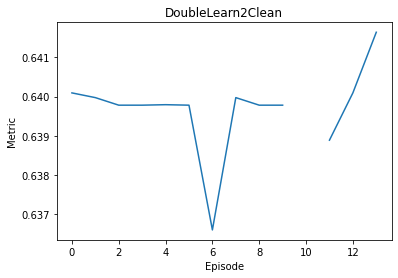

In [17]:
import learn2clean.qlearning.qlearner as ql
# Learn2clean finds the best strategy 'ZS -> ED -> NB'for maximal accuracy : 0.0.6408668730650154 for NB
# in 4.58 seconds
# The best strategy is stored in EOF of 'gpsu_example_results.txt' in 'save' directory as
# ('gpsu_example', 'learn2clean', 'NB', 'Sentiment', None, 'ZS -> ED -> NB', 'accuracy', 0.6408668730650154, 4.58355188369751)
l2c_c1assification1=ql.Qlearner(dataset = gpsu_encoded,goal='CART',target_goal='Sentiment',
                                target_prepare=None, file_name = 'gpsu_example', verbose = False)
l2c_c1assification1.learn2clean()

Start DoubleLearn2Clean
DoubleLearn2Clean - Pipeline construction -- CPU time: 0.14276409149169922 seconds
=== Start Pipeline Execution ===


Strategy# 0 : Greedy traversal for starting state DS
DS -> LOF -> LDA

Start pipeline
-------------
>>Normalization 
* For train dataset
... train dataset
* For test dataset
... test dataset
Normalization done -- CPU time: 0.03119206428527832 seconds


>>Outlier detection and removal:
* For train dataset
30 outlying rows have been removed
* For test dataset
30 outlying rows have been removed
Outlier detection and removal done -- CPU time: 0.27724695205688477 seconds


>>Classification task

Accuracy of LDA result for 10 cross-validation : 0.6406343958874892

Classification done -- CPU time: 0.06008601188659668 seconds
End Pipeline CPU time: 0.3687629699707031 seconds


Strategy# 1 : Greedy traversal for starting state MM
MM -> LOF -> LDA

Start pipeline
-------------
>>Normalization 
* For train dataset
... train dataset
* For test dataset
... te

Number of duplicate rows removed: 0
* For test dataset
Metric is not considered for 'AD'.
Number of duplicate rows removed: 0
Deduplication done -- CPU time: 0.9468681812286377 seconds


>>Classification task

Accuracy of LDA result for 10 cross-validation : 0.6405612856800191

Classification done -- CPU time: 0.05409407615661621 seconds
End Pipeline CPU time: 1.0010349750518799 seconds

Start pipeline
-------------

>>Classification task

Accuracy of LDA result for 10 cross-validation : 0.6405612856800191

Classification done -- CPU time: 0.05755496025085449 seconds
End Pipeline CPU time: 0.05758094787597656 seconds

==== Recap ====

List of strategies tried by DoubleLearn2Clean:
['DS -> LOF -> LDA', 'MM -> LOF -> LDA', 'ZS -> AD -> LDA', 'WR -> LOF -> LDA', 'LC -> LOF -> LDA', 'Tree -> ZSB -> LDA', 'ZSB -> LDA', 'LOF -> LDA', 'IQR -> LDA', 'CC -> LDA', 'PC -> IQR -> LDA', 'ED -> IQR -> LDA', 'AD -> LDA']

List of corresponding quality metrics ****
 [{'quality_metric': 0.6406343958874

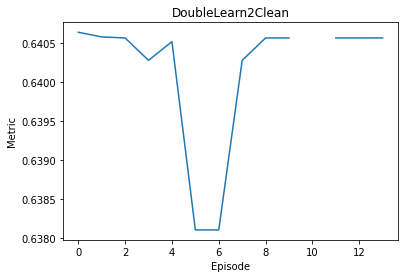

In [18]:
import learn2clean.qlearning.qlearner as ql
# Learn2clean finds the best strategy 'ZS -> ED -> NB'for maximal accuracy : 0.0.6408668730650154 for NB
# in 4.58 seconds
# The best strategy is stored in EOF of 'gpsu_example_results.txt' in 'save' directory as
# ('gpsu_example', 'learn2clean', 'NB', 'Sentiment', None, 'ZS -> ED -> NB', 'accuracy', 0.6408668730650154, 4.58355188369751)
l2c_c1assification1=ql.Qlearner(dataset = gpsu_encoded,goal='LDA',target_goal='Sentiment',
                                target_prepare=None, file_name = 'gpsu_example', verbose = False)
l2c_c1assification1.learn2clean()

Start DoubleLearn2Clean
DoubleLearn2Clean - Pipeline construction -- CPU time: 0.13640785217285156 seconds
=== Start Pipeline Execution ===


Strategy# 0 : Greedy traversal for starting state DS
DS -> LOF -> NB

Start pipeline
-------------
>>Normalization 
* For train dataset
... train dataset
* For test dataset
... test dataset
Normalization done -- CPU time: 0.027326107025146484 seconds


>>Outlier detection and removal:
* For train dataset
30 outlying rows have been removed
* For test dataset
30 outlying rows have been removed
Outlier detection and removal done -- CPU time: 0.2788207530975342 seconds


>>Classification task
Accuracy of Naive Naive Bayes classification for 10 cross-validation : 0.6406343843843845

Classification done -- CPU time: 0.06772828102111816 seconds
End Pipeline CPU time: 0.37407803535461426 seconds


Strategy# 1 : Greedy traversal for starting state MM
MM -> AD -> NB

Start pipeline
-------------
>>Normalization 
* For train dataset
... train dataset
* For 

Initial number of rows: 16676
After deduplication: Number of rows: 16676
* For test dataset
Metric is not considered for 'ED'.
Initial number of rows: 4285
After deduplication: Number of rows: 4285
Deduplication done -- CPU time: 0.0346529483795166 seconds

>>Normalization 
* For train dataset
... train dataset
* For test dataset
... test dataset
Normalization done -- CPU time: 0.022435903549194336 seconds


>>Outlier detection and removal:
* For train dataset
0 outlying rows have been removed
* For test dataset
0 outlying rows have been removed
Outlier detection and removal done -- CPU time: 0.026634931564331055 seconds


>>Classification task
Accuracy of Naive Naive Bayes classification for 10 cross-validation : 0.6405613121979921

Classification done -- CPU time: 0.0671091079711914 seconds
End Pipeline CPU time: 0.15109515190124512 seconds


Strategy# 12 : Greedy traversal for starting state AD
AD -> NB

Start pipeline
-------------

>>Duplicate detection and removal:
* For train da

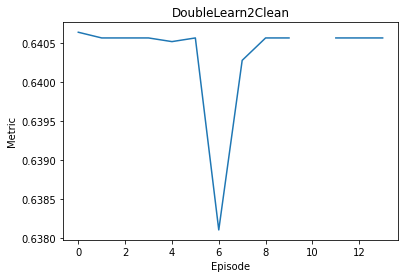

In [19]:
import learn2clean.qlearning.qlearner as ql
# Learn2clean finds the best strategy 'ZS -> ED -> NB'for maximal accuracy : 0.0.6408668730650154 for NB
# in 4.58 seconds
# The best strategy is stored in EOF of 'gpsu_example_results.txt' in 'save' directory as
# ('gpsu_example', 'learn2clean', 'NB', 'Sentiment', None, 'ZS -> ED -> NB', 'accuracy', 0.6408668730650154, 4.58355188369751)
l2c_c1assification1=ql.Qlearner(dataset = gpsu_encoded,goal='NB',target_goal='Sentiment',
                                target_prepare=None, file_name = 'gpsu_example', verbose = False)
l2c_c1assification1.learn2clean()

Start DoubleLearn2Clean
DoubleLearn2Clean - Pipeline construction -- CPU time: 0.12810778617858887 seconds
=== Start Pipeline Execution ===


Strategy# 0 : Greedy traversal for starting state DS
DS -> LOF -> AD -> LASSO

Start pipeline
-------------
>>Normalization 
* For train dataset
... train dataset
* For test dataset
... test dataset
Normalization done -- CPU time: 0.027039051055908203 seconds


>>Outlier detection and removal:
* For train dataset
30 outlying rows have been removed
* For test dataset
30 outlying rows have been removed
Outlier detection and removal done -- CPU time: 0.27722811698913574 seconds


>>Duplicate detection and removal:
* For train dataset
Metric is not considered for 'AD'.
Number of duplicate rows removed: 0
* For test dataset
Metric is not considered for 'AD'.
Number of duplicate rows removed: 0
Deduplication done -- CPU time: 1.2592189311981201 seconds


>>Regression task
Best alpha =  0.001
MSE of LASSO with 10  folds for cross-validation: 1.116570622

Initial number of rows: 16676
After deduplication: Number of rows: 16676
* For test dataset
Metric is not considered for 'ED'.
Initial number of rows: 4285
After deduplication: Number of rows: 4285
Deduplication done -- CPU time: 0.039475202560424805 seconds

>>Consistency checking
* For train dataset
Constraints from the file: gpsu_example_constraints.tdda
Constraints passing: 16

Constraints failing: 2

* For test dataset
Constraints from the file: gpsu_example_constraints.tdda
Constraints passing: 16

Constraints failing: 2

Consistency checking done -- CPU time: 0.10667705535888672 seconds

>>Regression task
Best alpha =  0.001
MSE of LASSO with 10  folds for cross-validation: 1.1486877052906703
Regression done -- CPU time: 0.038717031478881836 seconds
End Pipeline CPU time: 0.1849668025970459 seconds


Strategy# 12 : Greedy traversal for starting state AD
AD -> LASSO

Start pipeline
-------------

>>Duplicate detection and removal:
* For train dataset
Metric is not considered for 

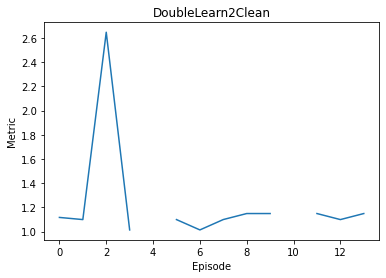

In [20]:
import learn2clean.qlearning.qlearner as ql
# Learn2clean finds the best strategy 'ZS -> ED -> NB'for maximal accuracy : 0.0.6408668730650154 for NB
# in 4.58 seconds
# The best strategy is stored in EOF of 'gpsu_example_results.txt' in 'save' directory as
# ('gpsu_example', 'learn2clean', 'NB', 'Sentiment', None, 'ZS -> ED -> NB', 'accuracy', 0.6408668730650154, 4.58355188369751)
l2c_c1assification1=ql.Qlearner(dataset = gpsu_encoded,goal='LASSO',target_goal='Sentiment',
                                target_prepare=None, file_name = 'gpsu_example', verbose = False)
l2c_c1assification1.learn2clean()

Start DoubleLearn2Clean
Reward matrix
[[ -1.  -1.  -1.   0.   0.   0.   0.   0.   0.  -1.  -1.   0.   0.  -1.]
 [ -1.  -1.  -1.   0.   0.   0.   0.   0.   0.  -1.  -1.   0.   0.  -1.]
 [ -1.  -1.  -1.   0.   0.   0.   0.   0.   0.  -1.  -1.   0.   0.  -1.]
 [  0.   0.   0.  -1.  -1.  -1.   0.   0.   0.  -1.  -1.   0.   0.  -1.]
 [  0.   0.   0.  -1.  -1.  -1.   0.   0.   0.  -1.  -1.   0.   0.  -1.]
 [  0.   0.   0.  -1.  -1.  -1.   0.   0.   0.  -1.  -1.   0.   0.  -1.]
 [ -1.  -1.  -1.   0.   0.   0.  -1.  -1.  -1.  -1.  -1.   0.   0. 100.]
 [ -1.  -1.  -1.   0.   0.   0.  -1.  -1.  -1.  -1.  -1.   0.   0. 100.]
 [ -1.  -1.  -1.   0.   0.   0.  -1.  -1.  -1.  -1.  -1.   0.   0. 100.]
 [ -1.  -1.  -1.  -1.  -1.  -1.   0.   0.   0.  -1.  -1.   0.   0. 100.]
 [ -1.  -1.  -1.  -1.  -1.  -1.   0.   0.   0.  -1.  -1.   0.   0. 100.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  -1.  -1. 100.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  -1.  -1. 100.]]
Qa-value mat

const                     1.406726
Sentiment_Polarity        0.039954
Sentiment_Subjectivity   -0.014062
dtype: float64

,const,Sentiment_Polarity,Sentiment_Subjectivity
10,1.0,0.719660,0.724321
16,1.0,0.388889,0.000000
20,1.0,0.388889,0.000000
23,1.0,0.819807,0.852755
27,1.0,0.955556,0.907407
...,...,...,...
20850,1.0,0.388889,0.000000
20919,1.0,0.962963,0.780488
20972,1.0,0.111111,0.548125
20998,1.0,0.388889,0.000000


(3,)

(4285, 3)

(3,)

(4285, 3)

MODIFICATION
                            OLS Regression Results                            
Dep. Variable:              Sentiment   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.147
Date:                Thu, 09 Jun 2022   Prob (F-statistic):              0.318
Time:                        11:43:07   Log-Likelihood:                -20541.
No. Observations:               16676   AIC:                         4.109e+04
Df Residuals:                   16673   BIC:                         4.111e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const          

const                     1.373357
New_ID                    0.053910
Sentiment_Polarity        0.040714
Sentiment_Subjectivity   -0.006756
dtype: float64

,const,New_ID,Sentiment_Polarity,Sentiment_Subjectivity
10,1.0,0.000000,0.715793,0.735972
16,1.0,0.000233,0.388889,0.000000
20,1.0,0.000467,0.388889,0.000000
23,1.0,0.000700,0.818172,0.855967
27,1.0,0.000934,0.955556,0.907407
...,...,...,...,...
20850,1.0,0.999066,0.388889,0.000000
20919,1.0,0.999300,0.962963,0.790123
20972,1.0,0.999533,0.148148,0.516755
20998,1.0,0.999767,0.388889,0.000000


(4,)

(4253, 4)

(4,)

(4253, 4)

MODIFICATION
                            OLS Regression Results                            
Dep. Variable:              Sentiment   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.673
Date:                Thu, 09 Jun 2022   Prob (F-statistic):             0.0457
Time:                        11:43:07   Log-Likelihood:                -20496.
No. Observations:               16646   AIC:                         4.100e+04
Df Residuals:                   16642   BIC:                         4.103e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const          

const                     1.418326
Sentiment_Polarity        0.010473
Sentiment_Subjectivity   -0.002271
New_ID                    0.015781
dtype: float64

,const,Sentiment_Polarity,Sentiment_Subjectivity,New_ID
10,1.0,0.807272,0.918389,-1.731445
16396,1.0,1.697853,1.250214,0.995864
16398,1.0,0.191978,0.798182,0.996672
16,1.0,-0.465994,-0.986172,-1.730636
20,1.0,-0.465994,-0.986172,-1.729828
...,...,...,...,...
16364,1.0,-0.465994,-0.986172,0.991822
16366,1.0,0.777633,0.774141,0.992630
16372,1.0,1.568022,1.362034,0.993439
16377,1.0,-0.465994,-0.986172,0.994247


(4,)

(4285, 4)

(4,)

(4285, 4)

MODIFICATION
                            OLS Regression Results                            
Dep. Variable:              Sentiment   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.746
Date:                Thu, 09 Jun 2022   Prob (F-statistic):             0.0414
Time:                        11:43:07   Log-Likelihood:                -20538.
No. Observations:               16676   AIC:                         4.108e+04
Df Residuals:                   16672   BIC:                         4.111e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const          

const                     1.372401
Sentiment_Polarity        0.040811
Sentiment_Subjectivity   -0.005926
New_ID                    0.000003
dtype: float64

,const,Sentiment_Polarity,Sentiment_Subjectivity,New_ID
10,1.0,0.715793,0.735972,1
16396,1.0,0.944444,0.864198,3375
16398,1.0,0.557819,0.689521,3376
16,1.0,0.388889,0.000000,2
20,1.0,0.388889,0.000000,3
...,...,...,...,...
16364,1.0,0.388889,0.000000,3370
16366,1.0,0.708183,0.680230,3371
16372,1.0,0.911111,0.907407,3372
16377,1.0,0.388889,0.000000,3373


(4,)

(4285, 4)

(4,)

(4285, 4)

MODIFICATION
                            OLS Regression Results                            
Dep. Variable:              Sentiment   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.746
Date:                Thu, 09 Jun 2022   Prob (F-statistic):             0.0414
Time:                        11:43:08   Log-Likelihood:                -20538.
No. Observations:               16676   AIC:                         4.108e+04
Df Residuals:                   16672   BIC:                         4.111e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const          

const                 1.372323
Sentiment_Polarity    0.036547
New_ID                0.000003
dtype: float64

,const,New_ID,Sentiment_Polarity
10,1.0,1,0.715793
16396,1.0,3375,0.944444
16398,1.0,3376,0.557819
16,1.0,2,0.388889
20,1.0,3,0.388889
...,...,...,...
16364,1.0,3370,0.388889
16366,1.0,3371,0.708183
16372,1.0,3372,0.911111
16377,1.0,3373,0.388889


(3,)

(4285, 3)

(3,)

(4285, 3)

MODIFICATION
                            OLS Regression Results                            
Dep. Variable:              Sentiment   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     4.072
Date:                Thu, 09 Jun 2022   Prob (F-statistic):             0.0171
Time:                        11:43:08   Log-Likelihood:                -20538.
No. Observations:               16676   AIC:                         4.108e+04
Df Residuals:                   16673   BIC:                         4.110e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  

const                     1.372401
Sentiment_Polarity        0.040811
Sentiment_Subjectivity   -0.005926
New_ID                    0.000003
dtype: float64

,const,Sentiment_Polarity,Sentiment_Subjectivity,New_ID
10,1.0,0.715793,0.735972,1
16396,1.0,0.944444,0.864198,3375
16398,1.0,0.557819,0.689521,3376
16,1.0,0.388889,0.000000,2
20,1.0,0.388889,0.000000,3
...,...,...,...,...
16364,1.0,0.388889,0.000000,3370
16366,1.0,0.708183,0.680230,3371
16372,1.0,0.911111,0.907407,3372
16377,1.0,0.388889,0.000000,3373


(4,)

(4285, 4)

(4,)

(4285, 4)

MODIFICATION
                            OLS Regression Results                            
Dep. Variable:              Sentiment   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.746
Date:                Thu, 09 Jun 2022   Prob (F-statistic):             0.0414
Time:                        11:43:08   Log-Likelihood:                -20538.
No. Observations:               16676   AIC:                         4.108e+04
Df Residuals:                   16672   BIC:                         4.111e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const          

[964 rows x 7 columns]

Outlier detection and removal done -- CPU time: 0.04720902442932129 seconds


>>Outlier detection and removal:
* For train dataset
0 outlying rows have been removed
* For test dataset
0 outlying rows have been removed
Outlier detection and removal done -- CPU time: 0.03020000457763672 seconds


>>Regression task


const                     1.371194
Sentiment_Polarity        0.023909
Sentiment_Subjectivity   -0.003276
New_ID                    0.000004
dtype: float64

,const,Sentiment_Polarity,Sentiment_Subjectivity,New_ID
8192,1.0,0.388889,0.000000,1661
8196,1.0,0.388889,0.000000,1662
10,1.0,0.715793,0.735972,1
8202,1.0,0.388889,0.000000,1664
16398,1.0,0.557819,0.689521,3376
...,...,...,...,...
8175,1.0,0.388889,0.000000,1656
8177,1.0,0.738622,0.507937,1657
16377,1.0,0.388889,0.000000,3373
16378,1.0,0.093567,0.806584,3374


(4,)

(3321, 4)

(4,)

(3321, 4)

MODIFICATION
                            OLS Regression Results                            
Dep. Variable:              Sentiment   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.355
Date:                Thu, 09 Jun 2022   Prob (F-statistic):             0.0699
Time:                        11:43:08   Log-Likelihood:                -15647.
No. Observations:               12672   AIC:                         3.130e+04
Df Residuals:                   12668   BIC:                         3.133e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const          

const                     1.371483
Sentiment_Polarity        0.039849
Sentiment_Subjectivity   -0.005547
New_ID                    0.000003
dtype: float64

,const,Sentiment_Polarity,Sentiment_Subjectivity,New_ID
10,1.0,0.715793,0.735972,1
16,1.0,0.388889,0.000000,2
20,1.0,0.388889,0.000000,3
23,1.0,0.818172,0.855967,4
28,1.0,0.738622,0.636168,6
...,...,...,...,...
20638,1.0,0.792242,0.660352,4279
20639,1.0,0.911111,1.000000,4280
20972,1.0,0.148148,0.516755,4283
20998,1.0,0.388889,0.000000,4284


(4,)

(4255, 4)

(4,)

(4255, 4)

MODIFICATION
                            OLS Regression Results                            
Dep. Variable:              Sentiment   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.823
Date:                Thu, 09 Jun 2022   Prob (F-statistic):             0.0373
Time:                        11:43:08   Log-Likelihood:                -20505.
No. Observations:               16646   AIC:                         4.102e+04
Df Residuals:                   16642   BIC:                         4.105e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const          

const                     1.372401
Sentiment_Polarity        0.040811
Sentiment_Subjectivity   -0.005926
New_ID                    0.000003
dtype: float64

,const,Sentiment_Polarity,Sentiment_Subjectivity,New_ID
10,1.0,0.715793,0.735972,1
16396,1.0,0.944444,0.864198,3375
16398,1.0,0.557819,0.689521,3376
16,1.0,0.388889,0.000000,2
20,1.0,0.388889,0.000000,3
...,...,...,...,...
16364,1.0,0.388889,0.000000,3370
16366,1.0,0.708183,0.680230,3371
16372,1.0,0.911111,0.907407,3372
16377,1.0,0.388889,0.000000,3373


(4,)

(4285, 4)

(4,)

(4285, 4)

MODIFICATION
                            OLS Regression Results                            
Dep. Variable:              Sentiment   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.746
Date:                Thu, 09 Jun 2022   Prob (F-statistic):             0.0414
Time:                        11:43:08   Log-Likelihood:                -20538.
No. Observations:               16676   AIC:                         4.108e+04
Df Residuals:                   16672   BIC:                         4.111e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const          

Constraints passing: 16

Constraints failing: 2

FIELDS:

Sentiment: 2 failures  2 passes  type ✓  min_length ✗  max_length ✓  allowed_values ✗

Sentiment_Polarity: 0 failures  3 passes  type ✓  min ✓  max ✓

Sentiment_Subjectivity: 0 failures  4 passes  type ✓  min ✓  max ✓  sign ✓

App: 0 failures  4 passes  type ✓  min_length ✓  max_length ✓  max_nulls ✓

Translated_Review: 0 failures  3 passes  type ✓  min_length ✓  max_length ✓

SUMMARY:

Constraints passing: 16
Constraints failing: 2
                    field  failures  passes  type   min min_length   max  \
0               Sentiment         2       2  True   NaN      False   NaN   
1      Sentiment_Polarity         0       3  True  True        NaN  True   
2  Sentiment_Subjectivity         0       4  True  True        NaN  True   
3                     App         0       4  True   NaN       True   NaN   
4       Translated_Review         0       3  True   NaN       True   NaN   

  max_length  sign max_nulls allowed_values  
0 

const                     1.372401
Sentiment_Polarity        0.040811
Sentiment_Subjectivity   -0.005926
New_ID                    0.000003
dtype: float64

,const,Sentiment_Polarity,Sentiment_Subjectivity,New_ID
10,1.0,0.715793,0.735972,1
16,1.0,0.388889,0.000000,2
20,1.0,0.388889,0.000000,3
23,1.0,0.818172,0.855967,4
27,1.0,0.955556,0.907407,5
...,...,...,...,...
20850,1.0,0.388889,0.000000,4281
20919,1.0,0.962963,0.790123,4282
20972,1.0,0.148148,0.516755,4283
20998,1.0,0.388889,0.000000,4284


(4,)

(4285, 4)

(4,)

(4285, 4)

MODIFICATION
                            OLS Regression Results                            
Dep. Variable:              Sentiment   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.746
Date:                Thu, 09 Jun 2022   Prob (F-statistic):             0.0414
Time:                        11:43:08   Log-Likelihood:                -20538.
No. Observations:               16676   AIC:                         4.108e+04
Df Residuals:                   16672   BIC:                         4.111e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const          

Number of pattern violations on variable ' App 'for pattern# 0 : 3898
Indexes of rows to be removed: []
Number of pattern violations on variable ' Sentiment 'for pattern# 0 : 4285
Indexes of rows to be removed: [8192, 8196, 8201, 10, 8202, 16396, 8205, 16398, 16, 8208, 8210, 20, 16405, 23, 16408, 27, 28, 29, 30, 16413, 33, 16417, 35, 36, 16419, 39, 40, 42, 8235, 44, 16426, 46, 47, 16428, 16430, 50, 16433, 52, 58, 8251, 60, 61, 62, 16445, 64, 8256, 16448, 8259, 68, 16451, 70, 16454, 74, 76, 16463, 80, 84, 16469, 16473, 16474, 92, 16476, 95, 96, 16479, 16482, 101, 103, 104, 16487, 16494, 16495, 112, 16496, 16497, 117, 118, 16504, 121, 16506, 123, 125, 16509, 129, 16519, 136, 137, 8328, 16520, 140, 16523, 8335, 145, 8337, 149, 8343, 153, 156, 8348, 161, 162, 163, 164, 8354, 8358, 167, 8360, 8362, 171, 8363, 8367, 8368, 177, 178, 179, 8369, 8374, 183, 184, 8378, 188, 8380, 8381, 195, 196, 8388, 200, 8392, 202, 8393, 205, 8399, 208, 209, 210, 8403, 8405, 8406, 8407, 221, 224, 225, 227, 228,

30 outlying rows have been removed
with indexes: [5, 642, 1109, 2609, 8139, 9175, 11904, 12011, 13229, 14545, 18070, 20212, 22086, 22281, 23201, 24871, 24876, 25214, 25460, 26620, 26929, 28049, 30543, 30992, 31495, 33580, 41218, 42843, 43065, 43066]

Outliers:
      Sentiment  Sentiment_Polarity  Sentiment_Subjectivity  \
5             3            0.388889                0.000000   
642           3            0.388889                0.000000   
1109          3            0.388889                0.000000   
2609          3            0.388889                0.000000   
8139          2            0.851852                0.925926   
9175          3            0.388889                0.000000   
11904         2            0.888889                0.680400   
12011         3            0.388889                0.000000   
13229         2            0.911111                1.000000   
14545         3            0.388889                0.000000   
18070         3            0.388889           

const                     1.371483
Sentiment_Polarity        0.039849
Sentiment_Subjectivity   -0.005547
New_ID                    0.000003
dtype: float64

,const,Sentiment_Polarity,Sentiment_Subjectivity,New_ID
10,1.0,0.715793,0.735972,1
16,1.0,0.388889,0.000000,2
20,1.0,0.388889,0.000000,3
23,1.0,0.818172,0.855967,4
28,1.0,0.738622,0.636168,6
...,...,...,...,...
20638,1.0,0.792242,0.660352,4279
20639,1.0,0.911111,1.000000,4280
20972,1.0,0.148148,0.516755,4283
20998,1.0,0.388889,0.000000,4284


(4,)

(4255, 4)

(4,)

(4255, 4)

MODIFICATION
                            OLS Regression Results                            
Dep. Variable:              Sentiment   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.823
Date:                Thu, 09 Jun 2022   Prob (F-statistic):             0.0373
Time:                        11:43:09   Log-Likelihood:                -20505.
No. Observations:               16646   AIC:                         4.102e+04
Df Residuals:                   16642   BIC:                         4.105e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const          

const                     1.399892
Sentiment_Polarity        0.040653
Sentiment_Subjectivity   -0.006129
dtype: float64

,const,Sentiment_Polarity,Sentiment_Subjectivity
10,1.0,0.715793,0.735972
16,1.0,0.388889,0.000000
20,1.0,0.388889,0.000000
23,1.0,0.818172,0.855967
27,1.0,0.955556,0.907407
...,...,...,...
20850,1.0,0.388889,0.000000
20919,1.0,0.962963,0.790123
20972,1.0,0.148148,0.516755
20998,1.0,0.388889,0.000000


(3,)

(4285, 3)

(3,)

(4285, 3)

MODIFICATION
                            OLS Regression Results                            
Dep. Variable:              Sentiment   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.100
Date:                Thu, 09 Jun 2022   Prob (F-statistic):              0.333
Time:                        11:43:11   Log-Likelihood:                -20541.
No. Observations:               16676   AIC:                         4.109e+04
Df Residuals:                   16673   BIC:                         4.111e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const          

const                     1.372401
Sentiment_Polarity        0.040811
Sentiment_Subjectivity   -0.005926
New_ID                    0.000003
dtype: float64

,const,Sentiment_Polarity,Sentiment_Subjectivity,New_ID
10,1.0,0.715793,0.735972,1
16,1.0,0.388889,0.000000,2
20,1.0,0.388889,0.000000,3
23,1.0,0.818172,0.855967,4
27,1.0,0.955556,0.907407,5
...,...,...,...,...
20850,1.0,0.388889,0.000000,4281
20919,1.0,0.962963,0.790123,4282
20972,1.0,0.148148,0.516755,4283
20998,1.0,0.388889,0.000000,4284


(4,)

(4285, 4)

(4,)

(4285, 4)

MODIFICATION
                            OLS Regression Results                            
Dep. Variable:              Sentiment   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.746
Date:                Thu, 09 Jun 2022   Prob (F-statistic):             0.0414
Time:                        11:43:11   Log-Likelihood:                -20538.
No. Observations:               16676   AIC:                         4.108e+04
Df Residuals:                   16672   BIC:                         4.111e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const          

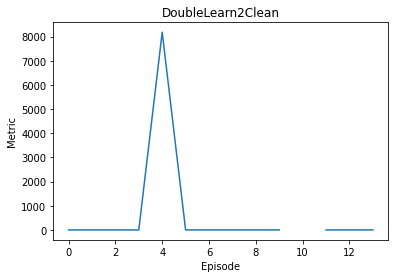

In [21]:
import learn2clean.qlearning.qlearner as ql
# Learn2clean finds the best strategy 'ZS -> ED -> NB'for maximal accuracy : 0.0.6408668730650154 for NB
# in 4.58 seconds
# The best strategy is stored in EOF of 'gpsu_example_results.txt' in 'save' directory as
# ('gpsu_example', 'learn2clean', 'NB', 'Sentiment', None, 'ZS -> ED -> NB', 'accuracy', 0.6408668730650154, 4.58355188369751)
l2c_c1assification1=ql.Qlearner(dataset = gpsu_encoded,goal='OLS',target_goal='Sentiment',
                                target_prepare=None, file_name = 'gpsu_example', verbose = True)
l2c_c1assification1.learn2clean()

Start DoubleLearn2Clean
DoubleLearn2Clean - Pipeline construction -- CPU time: 0.1443009376525879 seconds
=== Start Pipeline Execution ===


Strategy# 0 : Greedy traversal for starting state DS
DS -> LOF -> MARS

Start pipeline
-------------
>>Normalization 
* For train dataset
... train dataset
* For test dataset
... test dataset
Normalization done -- CPU time: 0.02811908721923828 seconds


>>Outlier detection and removal:
* For train dataset
30 outlying rows have been removed
* For test dataset
30 outlying rows have been removed
Outlier detection and removal done -- CPU time: 0.2717099189758301 seconds


>>Regression task
MSE of MARS with 10 folds for cross-validation: 0.5707391881041924
Regression done -- CPU time: 2.270158052444458 seconds
End Pipeline CPU time: 2.5701870918273926 seconds


Strategy# 1 : Greedy traversal for starting state MM
MM -> LOF -> MARS

Start pipeline
-------------
>>Normalization 
* For train dataset
... train dataset
* For test dataset
... test dataset
No

Number of pattern violations on variable ' App 'for pattern# 0 : 3898
Number of pattern violations on variable ' Sentiment 'for pattern# 0 : 4285
No record from the dataset satisfied the patterns!
Will return empty dataset - please change our patterns
Consistency checking done -- CPU time: 0.08056497573852539 seconds

>>Outlier detection and removal:
No outlier detection for train dataset
No outlier detection for test dataset
Outlier detection and removal done -- CPU time: 9.083747863769531e-05 seconds


>>Regression task
Error: Need at least one continous variable and  10  observations for regression
Regression done -- CPU time: 0.001956939697265625 seconds
End Pipeline CPU time: 0.13871216773986816 seconds


Strategy# 12 : Greedy traversal for starting state AD
AD -> MARS

Start pipeline
-------------

>>Duplicate detection and removal:
* For train dataset
Metric is not considered for 'AD'.
Number of duplicate rows removed: 0
* For test dataset
Metric is not considered for 'AD'.
Numb

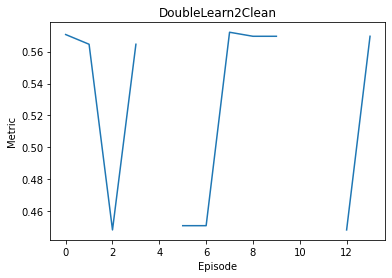

In [22]:
import learn2clean.qlearning.qlearner as ql
# Learn2clean finds the best strategy 'ZS -> ED -> NB'for maximal accuracy : 0.0.6408668730650154 for NB
# in 4.58 seconds
# The best strategy is stored in EOF of 'gpsu_example_results.txt' in 'save' directory as
# ('gpsu_example', 'learn2clean', 'NB', 'Sentiment', None, 'ZS -> ED -> NB', 'accuracy', 0.6408668730650154, 4.58355188369751)
l2c_c1assification1=ql.Qlearner(dataset = gpsu_encoded,goal='MARS',target_goal='Sentiment',
                                target_prepare=None, file_name = 'gpsu_example', verbose = False)
l2c_c1assification1.learn2clean()

Start DoubleLearn2Clean
DoubleLearn2Clean - Pipeline construction -- CPU time: 0.17999577522277832 seconds
=== Start Pipeline Execution ===


Strategy# 0 : Greedy traversal for starting state DS
DS -> AD -> HCA

Start pipeline
-------------
>>Normalization 
* For train dataset
... train dataset
* For test dataset
... test dataset
Normalization done -- CPU time: 0.03656506538391113 seconds


>>Duplicate detection and removal:
* For train dataset
Metric is not considered for 'AD'.
Number of duplicate rows removed: 0
* For test dataset
Metric is not considered for 'AD'.
Number of duplicate rows removed: 0
Deduplication done -- CPU time: 2.415724992752075 seconds


>>Clustering task
Note: The clustering is applied on the training dataset only.
Best silhouette = 0.85  for k= 3
Quality of clustering 0.85
Clustering done -- CPU time: 46.33231019973755 seconds
End Pipeline CPU time: 48.78771996498108 seconds


Strategy# 1 : Greedy traversal for starting state MM
MM -> LOF -> AD -> HCA

Start p

30 outlying rows have been removed
* For test dataset
30 outlying rows have been removed
Outlier detection and removal done -- CPU time: 0.3233058452606201 seconds


>>Duplicate detection and removal:
* For train dataset
Metric is not considered for 'AD'.
Number of duplicate rows removed: 0
* For test dataset
Metric is not considered for 'AD'.
Number of duplicate rows removed: 0
Deduplication done -- CPU time: 2.2991838455200195 seconds


>>Clustering task
Note: The clustering is applied on the training dataset only.
Best silhouette = 0.8314  for k= 3
Quality of clustering 0.8314
Clustering done -- CPU time: 43.76087403297424 seconds
End Pipeline CPU time: 46.434041023254395 seconds


Strategy# 12 : Greedy traversal for starting state AD
AD -> HCA

Start pipeline
-------------

>>Duplicate detection and removal:
* For train dataset
Metric is not considered for 'AD'.
Number of duplicate rows removed: 0
* For test dataset
Metric is not considered for 'AD'.
Number of duplicate rows remove

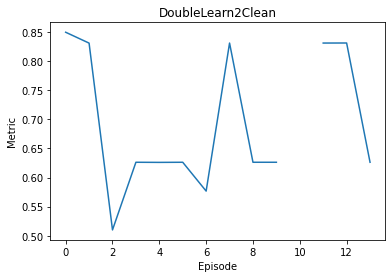

In [23]:
import learn2clean.qlearning.qlearner as ql
# Learn2clean finds the best strategy 'ZS -> ED -> NB'for maximal accuracy : 0.0.6408668730650154 for NB
# in 4.58 seconds
# The best strategy is stored in EOF of 'gpsu_example_results.txt' in 'save' directory as
# ('gpsu_example', 'learn2clean', 'NB', 'Sentiment', None, 'ZS -> ED -> NB', 'accuracy', 0.6408668730650154, 4.58355188369751)
l2c_c1assification1=ql.Qlearner(dataset = gpsu_encoded,goal='HCA',target_goal='Sentiment',
                                target_prepare=None, file_name = 'gpsu_example', verbose = False)
l2c_c1assification1.learn2clean()

Start DoubleLearn2Clean
DoubleLearn2Clean - Pipeline construction -- CPU time: 0.14678382873535156 seconds
=== Start Pipeline Execution ===


Strategy# 0 : Greedy traversal for starting state DS
DS -> LOF -> AD -> KMEANS

Start pipeline
-------------
>>Normalization 
* For train dataset
... train dataset
* For test dataset
... test dataset
Normalization done -- CPU time: 0.03138399124145508 seconds


>>Outlier detection and removal:
* For train dataset
30 outlying rows have been removed
* For test dataset
30 outlying rows have been removed
Outlier detection and removal done -- CPU time: 0.28371095657348633 seconds


>>Duplicate detection and removal:
* For train dataset
Metric is not considered for 'AD'.
Number of duplicate rows removed: 0
* For test dataset
Metric is not considered for 'AD'.
Number of duplicate rows removed: 0
Deduplication done -- CPU time: 2.4037559032440186 seconds


>>Clustering task
Note: The clustering is applied on the training dataset only.
Best silhouette = 0

Best silhouette = 0.5195  for k= 5
Quality of clustering 0.5195
Clustering done -- CPU time: 15.185890913009644 seconds
End Pipeline CPU time: 15.29233193397522 seconds


Strategy# 12 : Greedy traversal for starting state AD
AD -> KMEANS

Start pipeline
-------------

>>Duplicate detection and removal:
* For train dataset
Metric is not considered for 'AD'.
Number of duplicate rows removed: 0
* For test dataset
Metric is not considered for 'AD'.
Number of duplicate rows removed: 0
Deduplication done -- CPU time: 2.359890937805176 seconds


>>Clustering task
Note: The clustering is applied on the training dataset only.
Best silhouette = 0.8315  for k= 3
Quality of clustering 0.8315
Clustering done -- CPU time: 15.88570499420166 seconds
End Pipeline CPU time: 18.246298789978027 seconds

Start pipeline
-------------

>>Clustering task
Note: The clustering is applied on the training dataset only.
Best silhouette = 0.6267  for k= 2
Quality of clustering 0.6267
Clustering done -- CPU time: 16

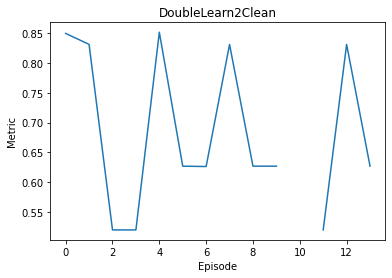

In [24]:
import learn2clean.qlearning.qlearner as ql
# Learn2clean finds the best strategy 'ZS -> ED -> NB'for maximal accuracy : 0.0.6408668730650154 for NB
# in 4.58 seconds
# The best strategy is stored in EOF of 'gpsu_example_results.txt' in 'save' directory as
# ('gpsu_example', 'learn2clean', 'NB', 'Sentiment', None, 'ZS -> ED -> NB', 'accuracy', 0.6408668730650154, 4.58355188369751)
l2c_c1assification1=ql.Qlearner(dataset = gpsu_encoded,goal='KMEANS',target_goal='Sentiment',
                                target_prepare=None, file_name = 'gpsu_example', verbose = False)
l2c_c1assification1.learn2clean()

## Random data preprocessing pipelines

In [25]:
import learn2clean.loading.reader as rd 
import learn2clean.qlearning.qlearner as ql

# d_enc = rd.Reader(sep=',',verbose=False, encoding=True) 
# gpsu  = ["../datasets/googleplaystore_reviews.csv"]
# gpsu_encoded = d_enc.train_test_split(gpsu, 'Sentiment')

# the results of random cleaning are stored in 'gpsu_example'_results_file.txt in 'save' directory
# appended to the EOF 
# random pipeline for LDA classification
random1=ql.Qlearner(gpsu_encoded.copy(),goal='CART',target_goal='Sentiment',target_prepare=None, verbose = False)
random1.random_cleaning('gpsu_example')

random2=ql.Qlearner(gpsu_encoded.copy(),goal='LDA',target_goal='Sentiment',target_prepare=None, verbose = False)
random2.random_cleaning('gpsu_example')

random3=ql.Qlearner(gpsu_encoded.copy(),goal='NB',target_goal='Sentiment',target_prepare=None, verbose = False)
random3.random_cleaning('gpsu_example')

random4=ql.Qlearner(gpsu_encoded.copy(),goal='LASSO',target_goal='Sentiment',target_prepare=None, verbose = False)
random4.random_cleaning('gpsu_example')

random5=ql.Qlearner(gpsu_encoded.copy(),goal='OLS',target_goal='Sentiment',target_prepare=None, verbose = False)
random5.random_cleaning('gpsu_example')

random6=ql.Qlearner(gpsu_encoded.copy(),goal='MARS',target_goal='Sentiment',target_prepare=None, verbose = False)
random6.random_cleaning('gpsu_example')

random7=ql.Qlearner(gpsu_encoded.copy(),goal='HCA',target_goal='Sentiment',target_prepare=None, verbose = False)
random7.random_cleaning('gpsu_example')

random8=ql.Qlearner(gpsu_encoded.copy(),goal='KMEANS',target_goal='Sentiment',target_prepare=None, verbose = False)
random8.random_cleaning('gpsu_example')
# gpsu_encoded['train']




--------------------------
Random cleaning strategy:
 ZS -> ZSB -> CART
--------------------------

Start pipeline
-------------
>>Normalization 
* For train dataset
... train dataset
* For test dataset
... test dataset
Normalization done -- CPU time: 0.0259702205657959 seconds


>>Outlier detection and removal:
* For train dataset
4004 outlying rows have been removed:
* For test dataset
964 outlying rows have been removed:
Outlier detection and removal done -- CPU time: 0.030617713928222656 seconds


>>Classification task
Avg accuracy of CART classification for 10 cross-validation : 0.6388875955771228

Classification done -- CPU time: 62.52108907699585 seconds
End Pipeline CPU time: 62.57785892486572 seconds
('gpsu_example', 'random', 'CART', 'Sentiment', None, 'ZS -> ZSB -> CART', 'accuracy', ({'quality_metric': 0.6388875955771228}, 62.57785892486572))


--------------------------
Random cleaning strategy:
 MM -> WR -> IQR -> LDA
--------------------------

Start pipeline
---------

const                     1.380619
New_ID                    0.053081
Sentiment_Polarity        0.040765
Sentiment_Subjectivity   -0.015406
dtype: float64

,const,New_ID,Sentiment_Polarity,Sentiment_Subjectivity
10,1.0,0.000000,0.719660,0.724321
16,1.0,0.000233,0.388889,0.000000
20,1.0,0.000467,0.388889,0.000000
23,1.0,0.000700,0.819807,0.852755
27,1.0,0.000934,0.955556,0.907407
...,...,...,...,...
20850,1.0,0.999066,0.388889,0.000000
20919,1.0,0.999300,0.962963,0.780488
20972,1.0,0.999533,0.111111,0.548125
20998,1.0,0.999767,0.388889,0.000000


(4,)

(4255, 4)

(4,)

(4255, 4)

MODIFICATION
MSE of OLS with 10  folds for cross-validation: 0.7097222292350561
Regression done -- CPU time: 0.02734994888305664 seconds
End Pipeline CPU time: 0.3685438632965088 seconds
('gpsu_example', 'random', 'OLS', 'Sentiment', None, 'DS -> LOF -> OLS', 'MSE', ({'quality_metric': 0.7097222292350561}, 0.3685438632965088))


--------------------------
Random cleaning strategy:
 DS -> ED -> MARS
--------------------------

Start pipeline
-------------
>>Normalization 
* For train dataset
... train dataset
* For test dataset
... test dataset
Normalization done -- CPU time: 0.03989291191101074 seconds


>>Duplicate detection and removal:
* For train dataset
Metric is not considered for 'ED'.
Initial number of rows: 16676
After deduplication: Number of rows: 16676
* For test dataset
Metric is not considered for 'ED'.
Initial number of rows: 4285
After deduplication: Number of rows: 4285
Deduplication done -- CPU time: 0.0705101490020752 seconds


>>Regression task
MSE of MARS with 10 f

ValueError: Input X must be non-negative.

In [ ]:
# no preprocessing: results appended to the EOF 'gpsu_example'_results.txt 

no_prep1=ql.Qlearner(gpsu_encoded.copy(),goal='HCA',target_goal='Sentiment',target_prepare=None, verbose = False)
no_prep1.no_prep('gpsu_example')

no_prep2=ql.Qlearner(gpsu_encoded.copy(),goal='LDA',target_goal='Sentiment',target_prepare=None, verbose = False)
no_prep2.no_prep('gpsu_example')

no_prep3=ql.Qlearner(gpsu_encoded.copy(),goal='NB',target_goal='Sentiment',target_prepare=None, verbose = False)
no_prep3.no_prep('gpsu_example')